#         $\;\;\;\;\;\;\;\;\;\;\;\;\;\;$       Assignment 1 -  Linear Regression with SGD

###  $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$  Vishwajeet Bhosale (CSU ID - 831303684)

In this assignment, you will implement three functions `train`, `use`, and `rmse` and apply them to some weather data.
Here are the specifications for these functions, which you must satisfy.

`model = train(X, T, learning_rate, n_epochs, verbose)`
* `X`: is an $N$ x $D$ matrix of input data samples, one per row. $N$ is the number of samples and $D$ is the number of variable values in
each sample.
* `T`: is an $N$ x $K$ matrix of desired target values for each sample.  $K$ is the number of output values you want to predict for each sample.
* `learning_rate`: is a scalar that controls the step size of each update to the weight values.
* `n_epochs`: is the number of epochs, or passes, through all $N$ samples, to take while updating the weight values.
* `verbose`: is True or False (default value) to control whether or not occasional text is printed to show the training progress.
* `model`: is the returned value, which must be a dictionary with the keys `'w'`, `'Xmeans'`, `'Xstds'`, `'Tmeans'` and `'Tstds'`.

`Y = use(X, model)`
* `X`: is an $N$ x $D$ matrix of input data samples, one per row, for which you want to predict the target values.
* `model`: is the dictionary returned by `train`.
* `Y`: is the returned $N$ x $K$ matrix of predicted values, one for each sample in `X`.

`result = rmse(Y, T)`
* `Y`: is an $N$ x $K$ matrix of predictions produced by `use`.
* `T`: is the $N$ x $K$ matrix of target values.
* `result`: is a scalar calculated as the square root of the mean of the squared differences between each sample (row) in `Y` and `T`.

To get you started, here are the standard imports we need.

In [166]:
import sys
sys.version
!python3 -m pip install matplotlib pandas

Defaulting to user installation because normal site-packages is not writeable


In [167]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from IPython.display import display, clear_output 

## 60 points: 40 for train, 10 for use, 10 for rmse

Now here is a start at defining the `train`, `use`, and `rmse`
functions.  Fill in the correct code wherever you see `. . .` with
one or more lines of code.

In [221]:
def train(X, T, learning_rate, n_epochs, verbose=False):

    # Calculate means and standard deviations of each column in X and T
    # mean
    x_mean = np.mean(X, axis = 0)
    x_std = np.std(X, axis = 0)
    
    
    t_mean = np.mean(T, axis = 0)
    t_std = np.std(T, axis = 0)

    X_copy = X.copy()
    T_copy = T.copy()
    
    # Use the means and standard deviations to standardize X and T
    Xs = (X_copy - x_mean)/ x_std
    Ts = (T_copy - t_mean)/ t_std

    # Insert the column of constant 1's as a new initial column in X
    
    X1 = np.insert(Xs, 0, 1, 1)
    
    # Initialize weights to be a numpy array of the correct shape and all zeros values.
    
    n_samples, n_inputs = X1.shape
    w = np.zeros((n_inputs, 1))
    
    # For plotting puposes only. Please ignore
    ws = [w.copy()]
    
    sample_rmse_list = []
    
    #fig = plt.figure(figsize=(8, 8))
    
    for epoch in range(n_epochs):
        sqerror_sum = 0

        for n in range(n_samples):

            # Use current weight values to predict output for sample n, then
            y = X1[n:n+1, : ] @ w
            # calculate the error, and
            error = Ts[n:n+1, :] - y  
            #error = y - T[n:n+1, :]
            # update the weight values.
            
            w += learning_rate * X1[n:n+1, :].T * error
            
            # Add the squared error to sqerror_sum
            #sqerror_list.append(error ** 2)
            
            sqerror_sum += (error ** 2)
            
            ws.append(w.copy())
            
   
        
        if verbose and (n_epochs < 11 or (epoch + 1) % (n_epochs // 10) == 0):
            rmse = np.sqrt(sqerror_sum / n_samples)
            rmse = rmse[0, 0]  # because rmse is 1x1 matrix
            print(f'Epoch {epoch + 1} RMSE {rmse:.2f}')
            
        
            

    return {'w': w, 'Xmeans': x_mean, 'Xstds': x_std, 'Tmeans': t_mean, 'Tstds': t_std}

In [170]:
def use(X, model):
    # Standardize X using Xmeans and Xstds in model
    X2 = (X - model['Xmeans'])/ model['Xstds']
    X3 = np.insert(X2, 0, 1, 1)
    # Predict output values using weights in model
    pred_val = X3 @ model['w']
    # Unstandardize the predicted output values using Tmeans and Tstds in model
    pred_val = ( pred_val * model['Tstds']) + model['Tmeans']
    
    # Return the unstandardized output values
    return pred_val

In [171]:
def rmse(A, B):
    # return round(np.mean(np.sqrt(((A - B) ** 2)), axis=0)[0], 4)
    rmse_val = (np.sqrt(((B - A) ** 2).mean())) 
    #return float("{:.4f}".format(rmse_val))
    
    return rmse_val

Here is a simple example use of your functions to help you debug them.  Your functions must produce the same results.

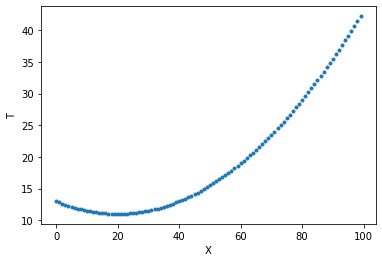

In [172]:
X = np.arange(0, 100).reshape(-1, 1)  # make X a 100 x 1 matrix
T = 0.5 + 0.3 * X + 0.005 * (X - 50) ** 2 #original
#T = -0.8 - 0.04 * X  + 0.003 * (X - 2)**3 #test
plt.plot(X, T, '.')
plt.xlabel('X')
plt.ylabel('T');

In [173]:
model = train(X, T, 0.0001, 500, verbose=True)
model

Epoch 50 RMSE 0.69
Epoch 100 RMSE 0.52
Epoch 150 RMSE 0.45
Epoch 200 RMSE 0.42
Epoch 250 RMSE 0.41
Epoch 300 RMSE 0.40
Epoch 350 RMSE 0.40
Epoch 400 RMSE 0.40
Epoch 450 RMSE 0.40
Epoch 500 RMSE 0.40


{'w': array([[5.27086555e-05],
        [9.11370918e-01]]),
 'Xmeans': array([49.5]),
 'Xstds': array([28.86607005]),
 'Tmeans': array([19.5175]),
 'Tstds': array([9.29491938])}

3.7261124601956763


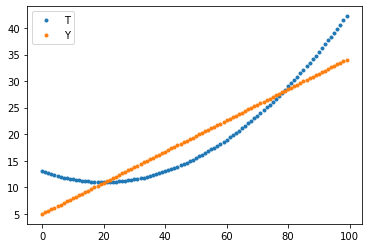

In [174]:
Y = use(X, model)
plt.plot(T, '.', label='T')
plt.plot(Y, '.', label='Y')
plt.legend()

rmse_val = rmse(Y,T)
print(rmse_val)

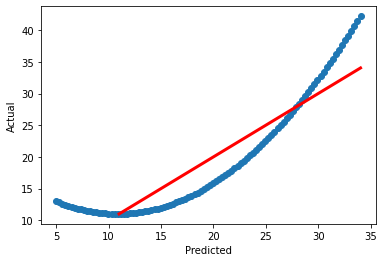

In [175]:
plt.plot(Y[:, 0], T[:, 0], 'o')
plt.xlabel('Predicted')
plt.ylabel('Actual')
a = max(min(Y[:, 0]), min(T[:, 0]))
b = min(max(Y[:, 0]), max(T[:, 0]))
plt.plot([a, b], [a, b], 'r', linewidth=3)

## Weather Data

Now that your functions are working, we can apply them to some real data. We will use data
from  [CSU's CoAgMet Station Daily Data Access](http://coagmet.colostate.edu/cgi-bin/dailydata_form.pl).

You can get the data file [here](http://www.cs.colostate.edu/~cs445/notebooks/A1_data.txt)

## 5 points:

Read in the data into variable `df` using `pandas.read_csv` like we did in lecture notes.
Missing values in this dataset are indicated by the string `'***'`.

In [176]:
df = pandas.read_csv('A1_data.txt', delim_whitespace=True, na_values='***')
print(df.head)

<bound method NDFrame.head of      Year  Mo  Dy    tave    tmax   mxtm    tmin   mntm     vp  rhmax  ...  \
0    2019   1   1 -13.535 -10.073  14:10 -16.997  23:50  0.153  0.830  ...   
1    2019   1   2  -5.791   6.010  14:50 -17.591  04:00  0.209  0.839  ...   
2    2019   1   3   1.374  13.444  13:50 -10.696  05:00  0.340  0.836  ...   
3    2019   1   4   4.544  15.089  14:40  -6.000  06:00  0.429  0.815  ...   
4    2019   1   5   4.465  14.441  12:50  -5.510  06:40  0.399  0.769  ...   
..    ...  ..  ..     ...     ...    ...     ...    ...    ...    ...  ...   
360  2019  12  27  -1.493   2.260  14:40  -5.245  07:30  0.403  0.908  ...   
361  2019  12  28  -2.695  -1.102  01:50  -4.288  07:00  0.363  0.973  ...   
362  2019  12  29  -3.731   1.871  13:30  -9.333  22:40  0.221  0.690  ...   
363  2019  12  30  -5.427   1.293  13:40 -12.147  06:20  0.226  0.833  ...   
364  2019  12  31  -4.175   4.810  13:10 -13.160  06:50  0.247  0.862  ...   

    st15mx  st15mxtm st15mn  st15

## 5 points:

Check for missing values by showing the number of NA values, as shown in lecture notes.

In [177]:
df.isna().sum()

Year          0
Mo            0
Dy            0
tave          0
tmax          0
mxtm          0
tmin          0
mntm          0
vp            0
rhmax         0
rhmxtm        0
rhmin         0
rhmntm        0
sr            0
wrun          0
pp            0
st5mx       211
st5mxtm     211
st5mn       211
st5mntm     211
st15mx        0
st15mxtm      0
st15mn        0
st15mntm      0
volts       365
year          0
gust          0
gusttm        0
gusdir      365
etr_asce      0
dtype: int64

## 5 points:

If there are missing values, remove either samples or features that contain missing values. Prove that you
were successful by counting the number of missing values now, which should be zero.

In [178]:
df.columns[df.isna().any()].tolist()

['st5mx', 'st5mxtm', 'st5mn', 'st5mntm', 'volts', 'gusdir']

In [179]:
df.drop(df.columns[df.isna().any()], axis = 1, inplace=True)

In [180]:
df.columns

Index(['Year', 'Mo', 'Dy', 'tave', 'tmax', 'mxtm', 'tmin', 'mntm', 'vp',
       'rhmax', 'rhmxtm', 'rhmin', 'rhmntm', 'sr', 'wrun', 'pp', 'st15mx',
       'st15mxtm', 'st15mn', 'st15mntm', 'year', 'gust', 'gusttm', 'etr_asce'],
      dtype='object')

In [181]:
df.isna().sum()

Year        0
Mo          0
Dy          0
tave        0
tmax        0
mxtm        0
tmin        0
mntm        0
vp          0
rhmax       0
rhmxtm      0
rhmin       0
rhmntm      0
sr          0
wrun        0
pp          0
st15mx      0
st15mxtm    0
st15mn      0
st15mntm    0
year        0
gust        0
gusttm      0
etr_asce    0
dtype: int64

Your job is now to create a linear model that predicts the next day's average temperature (tave) from the previous day's values. A discription of all features can be found [here](https://coagmet.colostate.edu/rawdata_docs.php). To start, consider just focusing on these features: 
1. tave: average temperature
2. tmax: maximum temperature
3. tmin: minimum temperature
4. vp: vapor pressure
5. rhmax: maximum relative humidity
6. rhmin: minimum relative humidity
7. pp: precipitation
8. gust: wind gust speed

First, modify the datafile to add a new column: 'next tave' -- here's a hint on your X and T vectors names:

### I have used some other features in addition to the 8 given above

In [182]:
#Xnames = ['tave', 'tmax', 'tmin', 'vp', 'rhmax', 'rhmin', 'pp', 'gust']
Xnames = ['tave', 'tmax', 'tmin', 'vp',
       'rhmax', 'rhmin', 'sr', 'wrun', 'pp', 'st15mx',
       'st15mn', 'gust', 'etr_asce']

Tnames = ['next_tave']

df['next_tave'] = df['tave']

In [183]:
print(df['next_tave'].head)
print(df['tave'].head)
df.head

<bound method NDFrame.head of 0     -13.535
1      -5.791
2       1.374
3       4.544
4       4.465
        ...  
360    -1.493
361    -2.695
362    -3.731
363    -5.427
364    -4.175
Name: next_tave, Length: 365, dtype: float64>
<bound method NDFrame.head of 0     -13.535
1      -5.791
2       1.374
3       4.544
4       4.465
        ...  
360    -1.493
361    -2.695
362    -3.731
363    -5.427
364    -4.175
Name: tave, Length: 365, dtype: float64>


<bound method NDFrame.head of      Year  Mo  Dy    tave    tmax   mxtm    tmin   mntm     vp  rhmax  ...  \
0    2019   1   1 -13.535 -10.073  14:10 -16.997  23:50  0.153  0.830  ...   
1    2019   1   2  -5.791   6.010  14:50 -17.591  04:00  0.209  0.839  ...   
2    2019   1   3   1.374  13.444  13:50 -10.696  05:00  0.340  0.836  ...   
3    2019   1   4   4.544  15.089  14:40  -6.000  06:00  0.429  0.815  ...   
4    2019   1   5   4.465  14.441  12:50  -5.510  06:40  0.399  0.769  ...   
..    ...  ..  ..     ...     ...    ...     ...    ...    ...    ...  ...   
360  2019  12  27  -1.493   2.260  14:40  -5.245  07:30  0.403  0.908  ...   
361  2019  12  28  -2.695  -1.102  01:50  -4.288  07:00  0.363  0.973  ...   
362  2019  12  29  -3.731   1.871  13:30  -9.333  22:40  0.221  0.690  ...   
363  2019  12  30  -5.427   1.293  13:40 -12.147  06:20  0.226  0.833  ...   
364  2019  12  31  -4.175   4.810  13:10 -13.160  06:50  0.247  0.862  ...   

        pp  st15mx st15mxtm  st15

## 5 points:

Now select those eight columns from `df` and convert the result to a `numpy` array.  (Easier than it sounds.)
Then assign `X` to be all columns and all but the last row.  Assign `T` to be just the first column (tave) and all but the first sample.  So now the first row (sample) in `X` is associated with the first row (sample) in `T` which tave for the following day.

In [185]:
X = df[Xnames].to_numpy()[:-1, :]
print(X.shape)

T = df[Tnames].to_numpy()[1:, :]
print(T.shape)


(364, 13)
(364, 1)


- ##### Plotting the valrious input fields to better understand the data

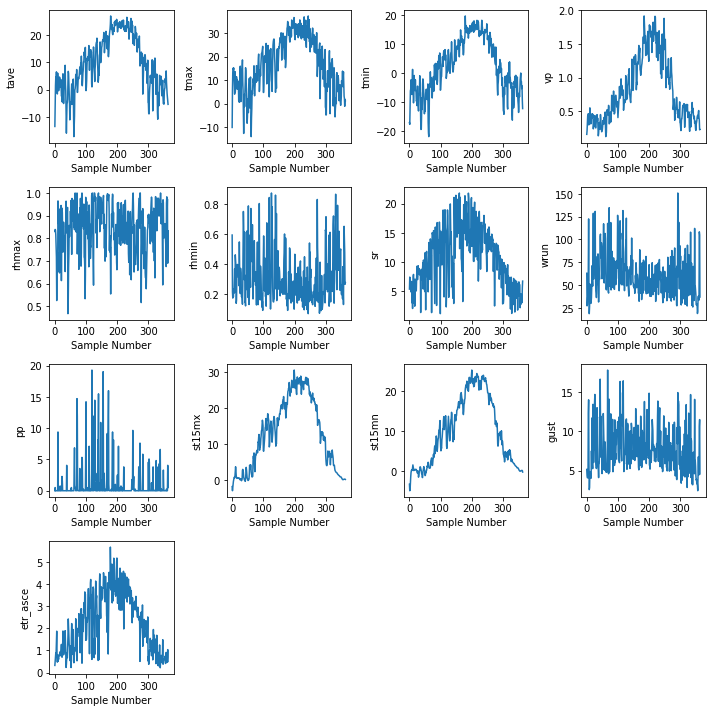

In [21]:
plt.figure(figsize=(10, 10))
nrow, ncol = X.shape


for c in range(ncol):
    plt.subplot(4, 4, c+1)
    plt.plot(X[:, c])
    plt.xlabel('Sample Number')
    plt.ylabel(Xnames[c])
plt.tight_layout()

## 15 points:

Use the function `train` to train a model for the `X`
and `T` data.  Run it several times with different `learning_rate`
and `n_epochs` values to produce decreasing errors. Use the `use`
function and plots of `T` versus predicted `Y` values to show how
well the model is working.  Type your observations of the plot and of the value of `rmse` to discuss how well the model succeeds.

## I have split this part into two :-

1> Using the whole dataset at once

2> Splitting the data into training and testing sets 

## 1> Using the whole dataset


#### Expreimenting with different learning rates and number of epochs

In [238]:
learning_rate = 0.000001
start_epoch = 500

while(learning_rate < 0.1):
    for num_epochs in range(start_epoch, 5500, 500):
        model = train(X, T,learning_rate, num_epochs)
        Y = use(X, model)
        rmse_val = rmse(Y, T)
        print('Learning Rate : {:.6f} | Epochs : {} | RMSE value : {} '.format(learning_rate, num_epochs, rmse_val))
        
    learning_rate = learning_rate * 10

Learning Rate : 0.000001 | Epochs : 500 | RMSE value : 3.4411 
Learning Rate : 0.000001 | Epochs : 1000 | RMSE value : 3.3519 
Learning Rate : 0.000001 | Epochs : 1500 | RMSE value : 3.2916 
Learning Rate : 0.000001 | Epochs : 2000 | RMSE value : 3.2474 
Learning Rate : 0.000001 | Epochs : 2500 | RMSE value : 3.2134 
Learning Rate : 0.000001 | Epochs : 3000 | RMSE value : 3.186 
Learning Rate : 0.000001 | Epochs : 3500 | RMSE value : 3.1634 
Learning Rate : 0.000001 | Epochs : 4000 | RMSE value : 3.1443 
Learning Rate : 0.000001 | Epochs : 4500 | RMSE value : 3.1279 
Learning Rate : 0.000001 | Epochs : 5000 | RMSE value : 3.1137 
Learning Rate : 0.000010 | Epochs : 500 | RMSE value : 3.1137 
Learning Rate : 0.000010 | Epochs : 1000 | RMSE value : 3.036 
Learning Rate : 0.000010 | Epochs : 1500 | RMSE value : 3.0051 
Learning Rate : 0.000010 | Epochs : 2000 | RMSE value : 2.9883 
Learning Rate : 0.000010 | Epochs : 2500 | RMSE value : 2.9774 
Learning Rate : 0.000010 | Epochs : 3000 | R

#### Selecting 3 Learning rates and epoch values to demostrate their effect on RMSE. Also, plotting the predicted and target values along with model 

Learning Rate : 0.000001 | Epochs : 500 | RMSE value : 4.178057910013386 
Learning Rate : 0.000100 | Epochs : 1000 | RMSE value : 2.9370728068598475 
Learning Rate : 0.001000 | Epochs : 5000 | RMSE value : 2.9269684453794 


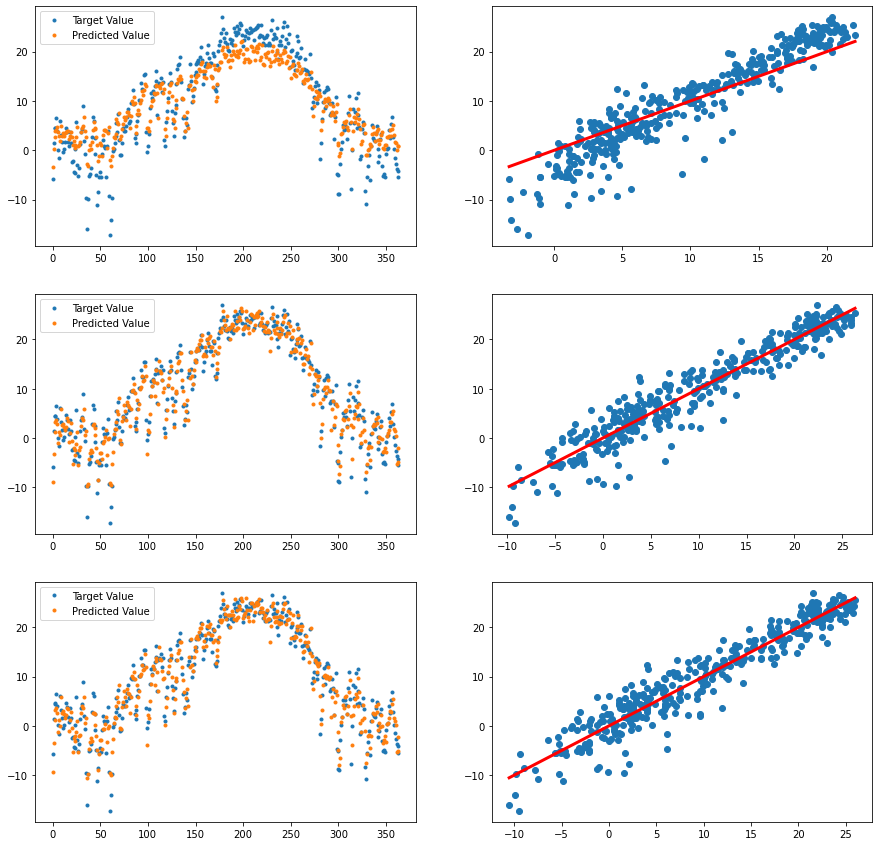

In [200]:
lr_list = [(0.000001, 500), (0.0001, 1000), (0.001, 5000)]

plt.figure(figsize=(15, 15))

i=0

for item in lr_list:
    model = train(X, T,item[0], item[1])
    Y = use(X, model)
    rmse_val = rmse(Y, T)
    print('Learning Rate : {:.6f} | Epochs : {} | RMSE value : {} '.format(item[0], item[1], rmse_val))
    
    plt.subplot(3, 2, i+1)
    plt.plot(T, '.', label='Target Value')
    plt.plot(Y, '.', label='Predicted Value')
    plt.legend()
    
    i += 1
    
    plt.subplot(3, 2, i+1)
    plt.plot(Y[:, 0], T[:, 0], 'o')
    a = max(min(Y[:, 0]), min(T[:, 0]))
    b = min(max(Y[:, 0]), max(T[:, 0]))
    plt.plot([a, b], [a, b], 'r', linewidth=3)
    
    i += 1

 ### Model weights

In [201]:
print(model['w'])

[[-0.00373701]
 [ 0.23231784]
 [ 0.12687242]
 [ 0.34282896]
 [ 0.12367427]
 [-0.03949714]
 [ 0.00736021]
 [ 0.30541419]
 [-0.116998  ]
 [ 0.01445585]
 [ 0.08851779]
 [ 0.01690824]
 [ 0.00236465]
 [-0.21491028]]


### Input variables and their corresponding weights

In [202]:
for wi, name in zip(model['w'].flat, Xnames):
    print('{:8.3f}  {:s}'.format(wi, name))

  -0.004  tave
   0.232  tmax
   0.127  tmin
   0.343  vp
   0.124  rhmax
  -0.039  rhmin
   0.007  sr
   0.305  wrun
  -0.117  pp
   0.014  st15mx
   0.089  st15mn
   0.017  gust
   0.002  etr_asce


 ## 2>  Splitting the data into testing and training sets

In [22]:
# Splitting the data in training and testing sets. Using 80:20 split

nrows = X.shape[0]
nTrain = int(round(nrow * 0.8))
nTest = nrow - nTrain
nTrain, nTest, nTrain + nTest

rows = np.arange(nrows)
np.random.shuffle(rows)

trainIndices = rows[:nTrain]
testIndices = rows[nTrain:]
trainIndices, testIndices

Xtrain = X[trainIndices, :]
Ttrain = T[trainIndices, :]
Xtest = X[testIndices, :]
Ttest = T[testIndices, :]
Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((291, 13), (291, 1), (73, 13), (73, 1))

### Experimenting with different learning rates and epochs

 - I got the lowest RMSE value for learning rate 0.01 when trained for 5000 epochs. If learning rate is further increased then the RMSE value increases sharply

In [208]:
learning_rate = 0.000001
start_epoch = 1000

while(learning_rate < 0.1):
    for num_epochs in range(start_epoch, 5500, 500):
        model = train(Xtrain, Ttrain,learning_rate, num_epochs)
        Y = use(Xtest, model)
        rmse_val = rmse(Y, Ttest)
        print('Learning Rate : {:.6f} | Epochs : {} | RMSE value : {} '.format(learning_rate, num_epochs, rmse_val))
        
    learning_rate = learning_rate * 10

Learning Rate : 0.000001 | Epochs : 1000 | RMSE value : 3.300728991519661 
Learning Rate : 0.000001 | Epochs : 1500 | RMSE value : 2.904757888009529 
Learning Rate : 0.000001 | Epochs : 2000 | RMSE value : 2.789363865876377 
Learning Rate : 0.000001 | Epochs : 2500 | RMSE value : 2.745766127092872 
Learning Rate : 0.000001 | Epochs : 3000 | RMSE value : 2.725988863012556 
Learning Rate : 0.000001 | Epochs : 3500 | RMSE value : 2.7158199308981428 
Learning Rate : 0.000001 | Epochs : 4000 | RMSE value : 2.7100089605100095 
Learning Rate : 0.000001 | Epochs : 4500 | RMSE value : 2.7063427826300632 
Learning Rate : 0.000010 | Epochs : 1000 | RMSE value : 2.692190143354724 
Learning Rate : 0.000010 | Epochs : 1500 | RMSE value : 2.6844191663019044 
Learning Rate : 0.000010 | Epochs : 2000 | RMSE value : 2.677978710466593 
Learning Rate : 0.000010 | Epochs : 2500 | RMSE value : 2.672665990941514 
Learning Rate : 0.000010 | Epochs : 3000 | RMSE value : 2.6682892312471607 
Learning Rate : 0.00

### Selecting 3 learing rates and epoch values to demonstrate their effect on RMSE. I have selected the same parameters as section 1 to compare them





Learning Rate : 0.000001 | Epochs : 500 | RMSE value : 4.9061 
Learning Rate : 0.000100 | Epochs : 1000 | RMSE value : 2.6472 


KeyboardInterrupt: 

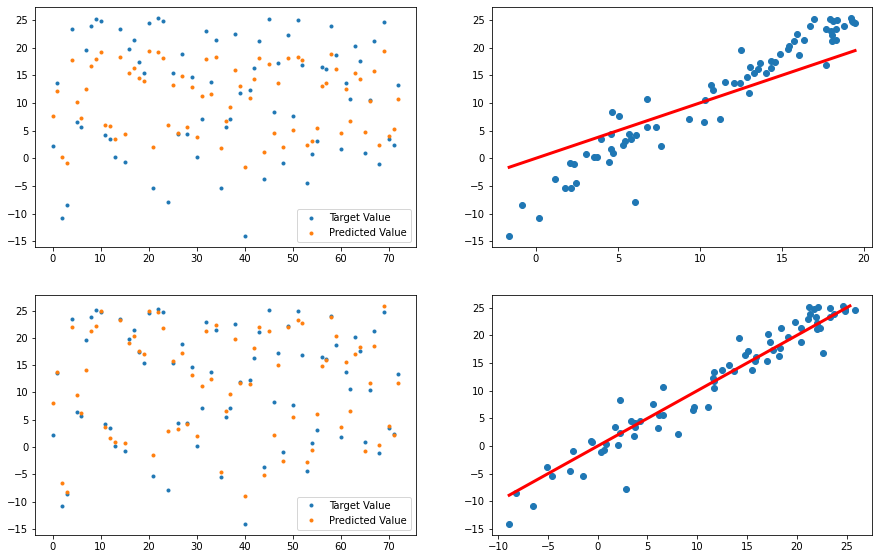

In [222]:
lr_list = [(0.000001, 500), (0.0001, 1000), (0.001, 5000)]

plt.figure(figsize=(15, 15))

i=0

print('\n\n\n')

for item in lr_list:
    model = train(Xtrain, Ttrain,item[0], item[1])
    Y = use(Xtest, model)
    rmse_val = rmse(Y, Ttest)
    print('Learning Rate : {:.6f} | Epochs : {} | RMSE value : {} '.format(item[0], item[1], rmse_val))
    
    plt.subplot(3, 2, i+1)
    plt.plot(Ttest, '.', label='Target Value')
    plt.plot(Y, '.', label='Predicted Value')
    plt.legend()
    
    i += 1
    
    plt.subplot(3, 2, i+1)
    plt.plot(Y[:, 0], Ttest[:, 0], 'o')
    a = max(min(Y[:, 0]), min(Ttest[:, 0]))
    b = min(max(Y[:, 0]), max(Ttest[:, 0]))
    plt.plot([a, b], [a, b], 'r', linewidth=3)
    
    i += 1

## 5 points:

Print the weight values in the resulting model along with their corresponding variable names (in `Xnames`). Use the relative magnitude
of the weight values to discuss which input variables are most significant in predicting the changes in the tave values.

In [164]:
print(model['w'])

[[ 1.35103616e-04]
 [ 2.10724192e-01]
 [ 6.06179530e-02]
 [ 3.79241249e-01]
 [ 1.38161617e-01]
 [-4.96045974e-02]
 [-1.54803029e-02]
 [ 2.84750537e-01]
 [-1.42745513e-01]
 [ 1.13546565e-02]
 [ 1.26545947e-01]
 [-1.16282649e-02]
 [ 6.80901399e-03]
 [-1.88761899e-01]]


#### - Input variables and their corresponding weight values

    

In [165]:
for wi, name in zip(model['w'].flat, Xnames):
    print('{:8.3f}  {:s}'.format(wi, name))

   0.000  tave
   0.211  tmax
   0.061  tmin
   0.379  vp
   0.138  rhmax
  -0.050  rhmin
  -0.015  sr
   0.285  wrun
  -0.143  pp
   0.011  st15mx
   0.127  st15mn
  -0.012  gust
   0.007  etr_asce


## Discussion and Observations -

- As can be seen from the table above, vp (vapour pressure) is the most significant variable in predicting the change in average temperature. The plot of different input variables shown above, corroborates the observation. The next significant variable is [wrun (wind run)]. This can not be deduced from just looking at the graph. st25mx and st15mn have less weightage than I expected

- Testing RMSE value is slightly less than training RMSE. This might have been caused by small size of testing data

- Up to a point increasing number of epochs results in lower RMSE value. However, RMSE value remains constant after a certain number of epochs

- Increasing learning rate ( till 0.0001 or 0.001) yeild better results but if I increase it above that then the RMSE value explodes

- From the graphs,It appears that the model fits pretty well too the linear data. The model seems a bit skewed towards higher temperatures. One reason can be the large number of data points having higher temperature values compared to lower temperature ones


## Grading and Check-in

Your notebook will be partially graded automatically.  You can test this grading process yourself by downloading [A1grader.zip](https://www.cs.colostate.edu/~cs445/notebooks/A1grader.zip) and extract `A1grader.py` parallel to this notebook.  Run the code in the in the following cell to see an example grading run.  If your functions are defined correctly, you should see a score of 60/60.  The remaining 40 points are based on testing other data and your discussion.


======================= Code Execution =======================

Extracting python code from notebook named 'bhosale-A1.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  T = (X - 5) * 0.05 + 0.002 * (X - 8)**2
  model = train(X, T, 0.001, 1000, True)

[5.375]
[3.35177192]
Epoch 100 RMSE 0.46
Epoch 200 RMSE 0.24
Epoch 300 RMSE 0.15
Epoch 400 RMSE 0.13
Epoch 500 RMSE 0.13
Epoch 600 RMSE 0.12
Epoch 700 RMSE 0.12
Epoch 800 RMSE 0.12
Epoch 900 RMSE 0.12
Epoch 1000 RMSE 0.12

--- 20/20 points. Returned correct values.

--- 10/10 points. Xmeans and Xstds are correct values.

--- 10/10 points. Tmeans and Tstds are correct values.

Testing
  Y = use(X, model)


--- 10/10 points. Returned correct values.

Testing
  err = rmse(Y, T)


--- 10/10 points. Returned correct values.
0.0176

cs445 Execution Grade is 60 / 60

 __ / 5 Reading in weather.data correctly

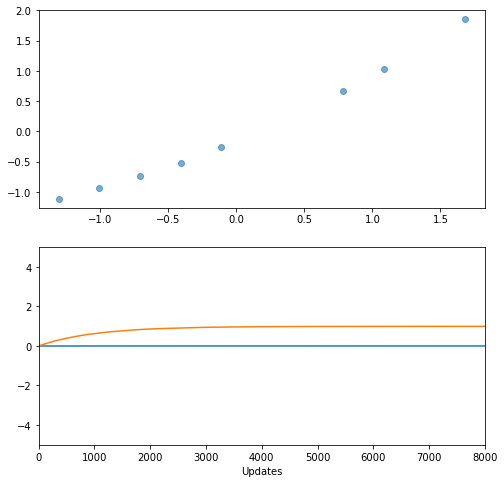

In [217]:
%run -i A1grader.py

A different but similar grading script will be used to grade yout checked-in notebook.  It will include different tests.

You must name your notebook as `Lastname-A1.ipynb` with `Lastname` being your last name, and then save this notebook and check it in at the A1 assignment link in our Canvas web page.

## Extra Credit: 1 point

A typical problem when predicting the next value in a time series is
that the best solution may be to predict the previous value.  The
predicted value will look a lot like the input tave value shifted on
time step later.

To do better, try predicting the change in tave from one day to the next. `T` can be assigned as

### - Reading the data from file once again to avoid any conflicts with previous modules

In [223]:
df = pandas.read_csv('A1_data.txt', delim_whitespace=True, na_values='***')
df.columns[df.isna().any()].tolist()

df.drop(df.columns[df.isna().any()], axis = 1, inplace=True)


Xnames = ['tave', 'tmax', 'tmin', 'vp',
       'rhmax', 'rhmin', 'sr', 'wrun', 'pp', 'st15mx',
       'st15mn', 'gust', 'etr_asce']

Tnames = ['next_tave']

df['next_tave'] = df['tave']

X = df[Xnames].to_numpy()[:-1, :]
print(X.shape)

# Storing the value on next days Tave so that it can be checked against predicted value
nxt_val = df[Tnames].to_numpy()[1:, :]

T = df[Tnames].to_numpy()
print(T.shape)

data = T.copy()

T = data[1:, 0:1] -  data[:-1, 0:1]

print(T.shape)


(364, 13)
(365, 1)
(364, 1)


In [242]:
model = train(X, T, 0.0001, 7000, verbose=True)
model
Y = use(X, model)


# First column is tave value. Therefore, taking it and adding the difference predicted by use() function
predicted_val = X[:,0:1] + Y


print(predicted_val.shape)

rmse_val = rmse(predicted_val, nxt_val )

print(f"RMSE value : {rmse_val}")


Epoch 700 RMSE 0.82
Epoch 1400 RMSE 0.81
Epoch 2100 RMSE 0.81
Epoch 2800 RMSE 0.81
Epoch 3500 RMSE 0.81
Epoch 4200 RMSE 0.81
Epoch 4900 RMSE 0.81
Epoch 5600 RMSE 0.81
Epoch 6300 RMSE 0.81
Epoch 7000 RMSE 0.81
(364, 1)
RMSE value : 2.9257


### - After trying some combinations of learning rates and number of epochs, I get RMSE value of 2.9257 with this approach. This is exactly the same that I got by previous approach (RMSE - 2.9257)